# SEA4001W - Introduction to Ocean modelling - Exercise 1 - 19/05/2025
## Ethan Smith SMTETH005 

Text(0.5, 1.0, 'Proliferation of $\\it{Isochrysis\\ galbana}$ cells from a batch experiment by Flyn et al. (1964)')

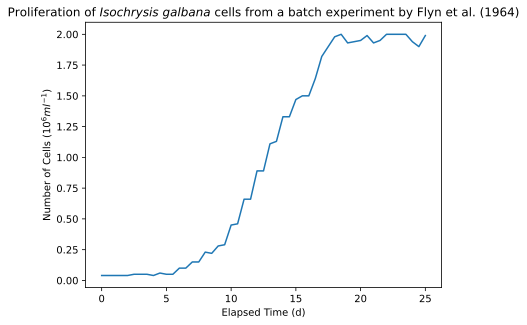

In [1]:
# Import packages 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Render the plot as scalable vector graphics (consistent sharpness in the notebook) 
%config InlineBackend.figure_format = 'svg'

# Import the batch experiment data file. 
BE_data = pd.read_csv(r"C:\Users\ethan\OneDrive\UCT\Honours 2025\SMETH005_IOM2025\HonsUCT_IntroOceMod\data\flynn94.csv") 

# Plot cells (y) over time (x)
plt.plot(BE_data['time'], BE_data['cells'])
plt.xlabel('Elapsed Time (d)')
plt.ylabel('Number of Cells ($10^6 ml^{-1}$)')
plt.title(r'Proliferation of $\it{Isochrysis\ galbana}$ cells from a batch experiment by Flyn et al. (1964)')

### Question 1 - Is the growth exponential?

There is little to no growth over the first five days of the experiment. The growth is relatively sluggish and *approximately linear* between days five and ten. The gorwth *increases exponentially* from day ten onwards, untill about day 18, on which the maximum cell count was reached ($2\cdot 10^8\ ml^{-1}$). The remainder of the experiment saw the cell count varying around this maximum. The growth is more **logisitc** than exponential, because it slows down and tapers off to a maximum. 

### Question 2 - Can you separate the growth curve into some phases?

There is a clear **lag phase** from day zero until day five. Between day five and ten **(linear phase)** the growth is not as rapid as between day ten and 18 **(exponential phase)**. The growth fluctuates around zero for the remainder of the experiment, I would call this the **stationary phase**. If time goes on I would expect to see a **decling/death phase** due to nutrient depletion and subsequent senescence. 

### Question 3 - How different is the growth expressed in cellular carbon from the one in cell number and chlorophyll?

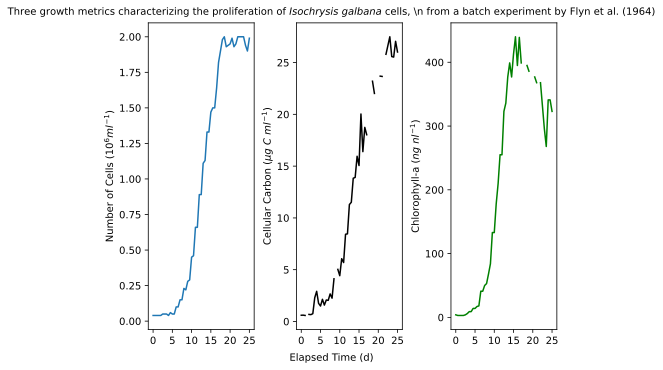

In [2]:
# Plot cells, cellular carbon and chlorophyll over time (x)

xticks = np.arange(0, 30, 5) # generate x ticks for days 

fig, ax = plt.subplots(1,3, sharex= True, constrained_layout = True) # create the figure and axis objects 
ax[0].plot(BE_data['time'], BE_data['cells']) # cell count over time 
ax[0].set_ylabel(r'Number of Cells ($10^6 ml^{-1}$)')
ax[0].set_xticks(xticks)
ax[1].plot(BE_data['time'], BE_data['cellC'], color = 'black') # cell carbon over time 
ax[1].set_ylabel(r'Cellular Carbon ($\mu g\ C\ ml^{-1}$)')
ax[2].plot(BE_data['time'], BE_data['chl-a'], color = 'green') # chlorophyll-a over time 
ax[2].set_ylabel(r'Chlorophyll-a ($ng\ nl^{-1}$)')

fig.supxlabel('Elapsed Time (d)', y = -0.04, fontsize = 10) # shared x label
fig.suptitle(r'Three growth metrics characterizing the proliferation of $\it{Isochrysis\ galbana}$ cells, \n from a batch experiment by Flyn et al. (1964)', fontsize = 10) # multi-line title
%config InlineBackend.figure_format = 'svg'

All three growth metrics follow the same general trend during the exponential growth phase, but changes at the advanced stage identifies the possible onset of nutrient depletion. They differ during the lag and stationary phases. Both cellular carbon and chlorophyll-a build up during the lag phase, while the number of cells remains almost constant. I think this is because individuals are growing and only start reproducing after they have reached some threshold, which could be the age of maturation or sufficient energy reserves. Chlorophyll-a decreases close to the end of the experiment, which is lkely indicates that indivduals are dismantling/recycling photosynthetic organelles due to nutrient depletion. If they are starving they are likely to do this. 

### Question 4 - Is the ammonium consumption approximated by an exponential curve?

Text(0.5, 1.0, 'Ammonium drawdown by $\\it{Isochrysis\\ galbana}$ cells from a batch experiment by Flyn et al. (1964)')

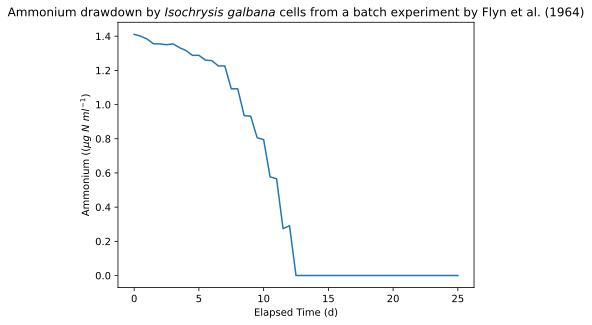

In [3]:
#Plot ammonium (y) over time (x)

%config InlineBackend.figure_format = 'svg'
plt.plot(BE_data['time'], BE_data['ammonium'])
plt.xlabel('Elapsed Time (d)')
plt.ylabel(r'Ammonium (($\mu g\ N\ ml^{-1}$)')
plt.title(r'Ammonium drawdown by $\it{Isochrysis\ galbana}$ cells from a batch experiment by Flyn et al. (1964)')

The ammonium concentration **decreases exponentially** from the start of the experiment unitll it is depleted by day 12. It shows that *Isochrysis galbana* likey has the ability to take up nutirents in excess of what is required for photosynthesis (luxury nutrient uptake). 

### Question 5 - How would you estimate the parameters of the growth curve?

The population growth curve (change in population over time) can be approximated as a logistic function: 

$$
N(t) = \frac{K}{1 + \left(\frac{K - N_0}{N_0}\right) e^{-rt}}
$$

where: 

$N(t)$ = population size (cells $ml^{-1}$) at time $t$

$t$ = time (days)

with the following parameters: 

$N_0$ = initial population size at $t = 0$, in cells $ml^{-1}$

$K$ = carrying capacity (cells $ml^{-1}$)

$r$ = maximum specific growth rate ($d^{-1}$) 

The initial population size in the case of Flyn et al. (1964) is $(0.04\cdot 10^6\ ml^{-1})$. The carrying capacity is the number of cells during the stationary phase of the experiment, which is roughly $(1.9\cdot 10^6\ ml^{-1})$. The maximum specifc growth can be estimated from the slope of logtransformed growth plotted against time. 